In [1]:
import numpy as np
import pandas as pd

In [76]:
data = pd.read_csv('Heart_Disease_Dataset.csv')

print(data.shape)

In [32]:
d_size = data.shape
print('data size is:', d_size)
a = data['target']
b = [a[i] for i in range(len(a))]
c = np.sum(b)

print(100*c/len(b), ' percent of the subjects are parient. Data is balanced')

data size is: (1190, 12)
52.857142857142854  percent of the subjects are parient. Data is balanced


In [11]:
temp = data['target']
age_patient = []
age_healthy = []
sex_patient = []
sex_healthy = []
for i in range(len(temp)):
    if temp[i]==1:
        age_patient.append(data['age'][i])
        sex_patient.append(data['sex'][i])
    else:
        age_healthy.append(data['age'][i])
        sex_healthy.append(data['sex'][i])





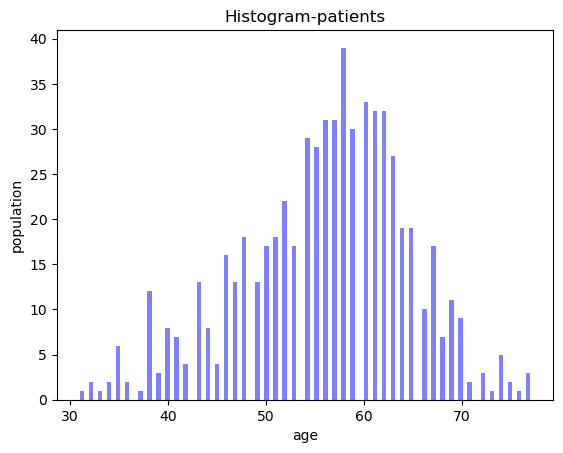

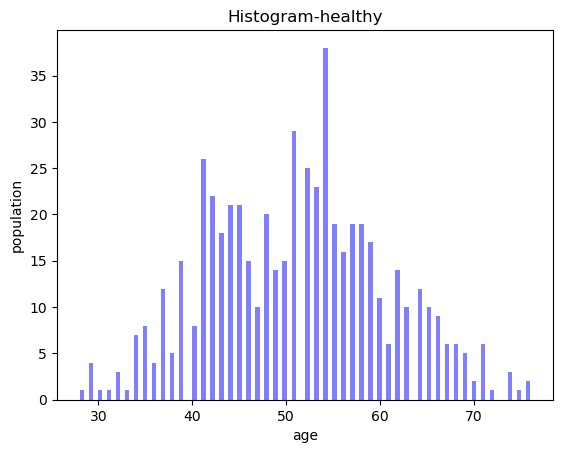

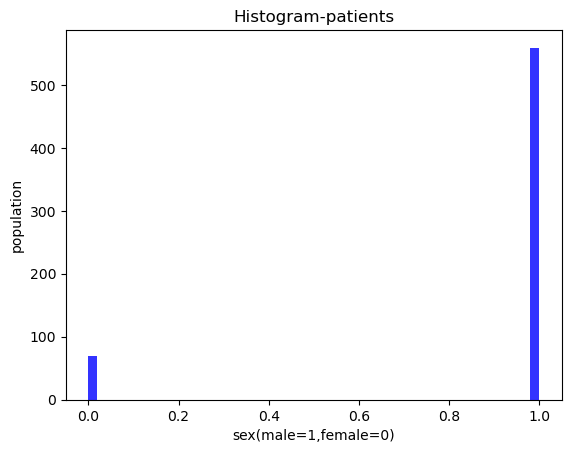

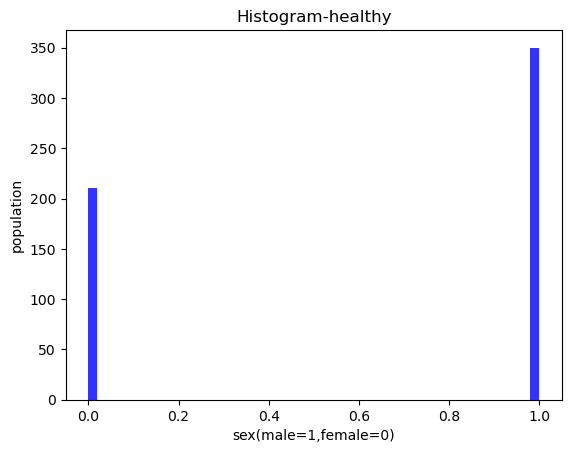

In [20]:
import matplotlib.pyplot as plt
plt.hist(age_patient, bins = 100, color = 'blue', alpha=0.5)
plt.xlabel('age')
plt.ylabel('population')
plt.title('Histogram-patients')
plt.show()

plt.hist(age_healthy, bins = 100, color = 'blue', alpha=0.5)
plt.xlabel('age')
plt.ylabel('population')
plt.title('Histogram-healthy')
plt.show()

plt.hist(sex_patient, bins = 50, color = 'blue', alpha=0.8)
plt.xlabel('sex(male=1,female=0)')
plt.ylabel('population')
plt.title('Histogram-patients')
plt.show()

plt.hist(sex_healthy, bins = 50, color = 'blue', alpha=0.8)
plt.xlabel('sex(male=1,female=0)')
plt.ylabel('population')
plt.title('Histogram-healthy')
plt.show()

In [33]:
from scipy import stats
def remove_outliers_ztest(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    outliers = np.where(z_scores > threshold)
    filtered_data = np.delete(data, outliers)
    return filtered_data,outliers

In [64]:
age_ed, outlier_idx = remove_outliers_ztest(age_patient, 3)

In [65]:
features = ['age','sex','chest pain type','resting bp s','cholesterol','fasting blood sugar','resting ecg','max heart rate','exercise angina','oldpeak','ST slope']

for i in features:
    data[i] = data[i] / np.max(data[i])



In [99]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [100]:
data_x = data.values
X_train, X_test, y_train, y_test = train_test_split(data_x, data['target'], test_size=0.3, random_state=42)

In [89]:
len(X_test)

357

In [101]:
classifier = SVC(kernel='linear',gamma = 0.54)  # You can change the kernel type here (e.g., 'rbf', 'poly')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('linear kernel:')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print('----------------------')

classifier = SVC(kernel='poly',gamma = 0.24,degree = 4)  # You can change the kernel type here (e.g., 'rbf', 'poly')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('polynomial kernel:')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print('----------------------')

classifier = SVC(kernel='rbf',gamma = 0.31)  # You can change the kernel type here (e.g., 'rbf', 'poly')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('rbf kernel:')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


linear kernel:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
----------------------
polynomial kernel:
Accuracy: 0.9943977591036415
Precision: 0.9902439024390244
Recall: 1.0
F1-score: 0.9950980392156863
----------------------
rbf kernel:
Accuracy: 0.7310924369747899
Precision: 0.6789297658862876
Recall: 1.0
F1-score: 0.8087649402390438
